### Machine Learning Exercise 1 - Linear Regression
This notebook covers a Python-based solution for the first programming exercise of the machine learning class on Coursera. Please refer to the exercise text for detailed descriptions and equations.

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem. We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.



#### Linear regression with one variable
In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Let's start by importing some libraries and examining the data.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

In [32]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [33]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Let's plot it to get a better idea of what the data looks like.

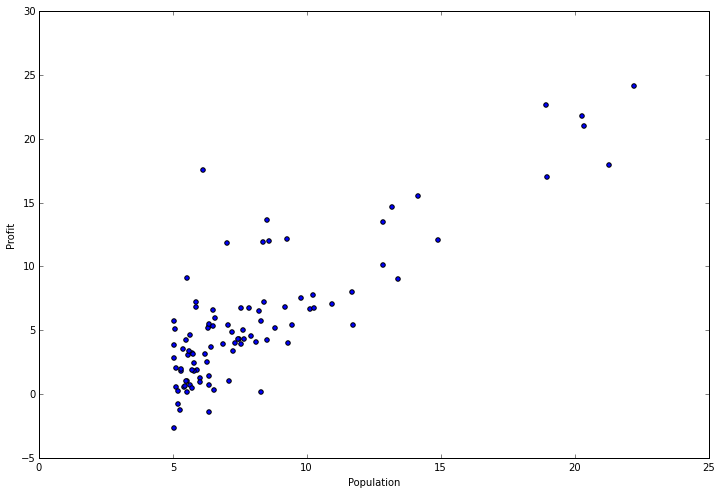

In [34]:
data.plot(kind='scatter',x='Population', y='Profit',figsize=(12,8))

In [35]:
def computeCost(X, y, theta):
    h = X*theta.T
    inner = np.square(h - y)
    m = len(X)
    return np.sum(inner)/(2*m)

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [36]:
data.insert(0, 'Ones', 1)

In [37]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [38]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [39]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [40]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [44]:
theta = np.matrix(np.array([0,0]))

In [45]:
computeCost(X,y,theta)

32.072733877455676

In [58]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = X*theta.T - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] =  computeCost(X, y, theta)
    return theta, cost

In [59]:
alpha = 0.01
iters = 1000

In [60]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [61]:
computeCost(X, y, g)

4.5159555030789118